In [1]:
from csv import DictReader
from datetime import datetime
import numpy as np
from operator import itemgetter, attrgetter
import itertools
import matplotlib as plt

%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')

### Število iger po žanrih

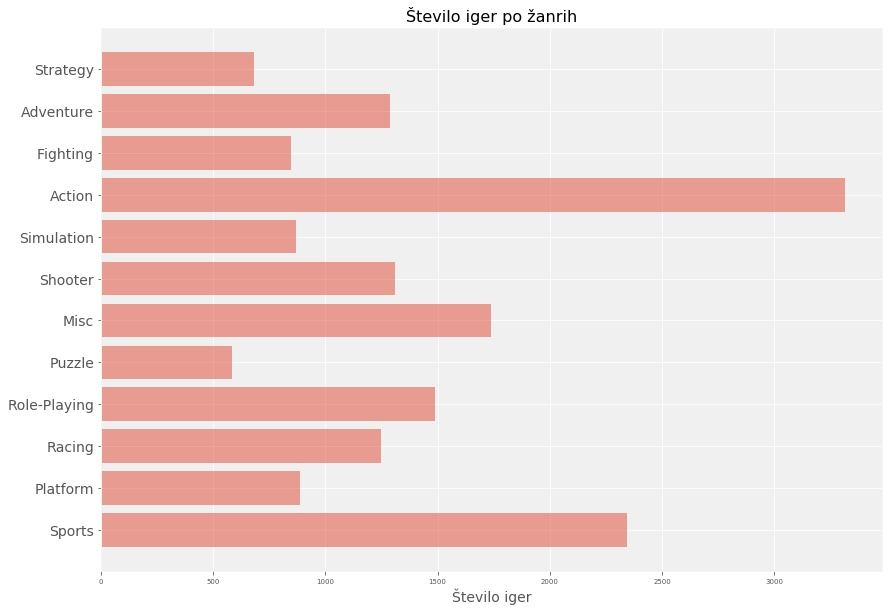

In [2]:
videogames_data = {}
genre = dict()


with open('../../podatki/vgsales.csv', 'rt', encoding='utf-8') as data:
    for row in DictReader(data):
        videogames_data[row['Rank']] = row
                        

# Primer branja iz slovarja podatkov
for key, value in videogames_data.items():
    for atribut, vrednost in value.items():
        if atribut == "Genre":
            if vrednost in genre:
                genre[vrednost] += 1
            else:
                genre[vrednost] = 1
                

names = list()
values = list()
for item in genre:
    names.append(item)
    values.append(genre[item])
y_pos = np.arange(len(names))

fig = plt.figure(figsize=(14, 10))
plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, names, fontsize=14)
plt.xlabel("Število iger", fontsize=14)
plt.title('Število iger po žanrih', fontsize=16);

plt.show()

fig.savefig('../../slike/stevilo_iger_po_žanrih.png')

### Število iger proizvedenih na leto

Leto | Število proizvedenih iger 
 --- | ----
1980 | 9
1981 | 46
1982 | 36
1983 | 17
1984 | 14
1985 | 14
1986 | 21
1987 | 16
1988 | 15
1989 | 17
1990 | 16
1991 | 41
1992 | 43
1993 | 60
1994 | 121
1995 | 219
1996 | 263
1997 | 289
1998 | 379
1999 | 338
2000 | 349
2001 | 482
2002 | 829
2003 | 775
2004 | 763
2005 | 941
2006 | 1008
2007 | 1202
2008 | 1428
2009 | 1431
2010 | 1259
2011 | 1139
2012 | 657
2013 | 546
2014 | 582
2015 | 614
2016 | 344
2017 | 3
2020 | 1
N/A | 271


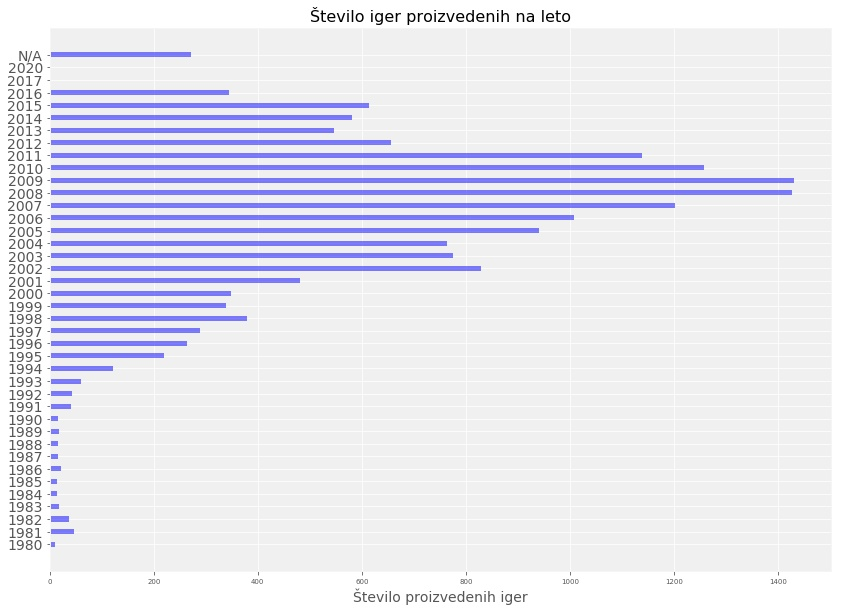

In [3]:
genre = dict()
for key, value in videogames_data.items():
    for atribut, vrednost in value.items():
        if atribut == "Year":
            if vrednost in genre:
                genre[vrednost] += 1
            else:
                genre[vrednost] = 1

names = list()
values = list()
i = 0

print("Leto | Število proizvedenih iger \n --- | ----")
for item in sorted(genre):
    if(i == 10):
        i = 0
    i += 1
    print(str(item), "|", str(genre[item]))
    names.append(item)
    values.append(genre[item])
y_pos = np.arange(len(names)) * 2

fig = plt.figure(figsize=(14, 10))
plt.barh(y_pos, values, align='center', alpha=0.5, color='blue')
plt.yticks(y_pos, names, fontsize=14)
plt.xlabel("Število proizvedenih iger", fontsize=14)
plt.title('Število iger proizvedenih na leto', fontsize=16);
plt.show()

fig.savefig('../../slike/stevilo_iger_proizvedenih_na_leto.png')